# Bayesian NNs

# Resources

Nice Examples:
1. https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/DL2/Bayesian_Neural_Networks/dl2_bnn_tut1_students_with_answers.html
2. https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825 


# Data Import an Preprocessing

In [1]:
import pandas as pd
import math as m

In [2]:
df=pd.read_csv("TestData\\800_CFB_xy.csv")
df

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,0,0,5896.042103,10183.791863,1189.025419,587.175975,3951.288982,16.589760,24.595059,15.124578,...,2463.710938,-1140.493774,eta_1_x,0.0,41.178042,9817.936523,245.655258,-3552.487061,eta_3_top,0.0
1,1,1,9783.893188,15582.253981,434.089655,668.134731,4157.543342,10.005126,15.433241,11.179018,...,4856.115234,-394.626953,eta_1_x,52.0,0.007260,14298.742188,4259.643555,-394.626953,eta_3_top,433.0
2,2,2,3518.491402,15074.031207,509.342737,453.005723,4833.272653,19.790377,21.281638,25.048946,...,181.202286,-2277.959229,eta_1_x,0.0,7.161654,12240.676758,181.202286,-4713.654297,eta_3_bot,0.0
3,3,3,8975.183339,9902.815547,562.704986,824.904330,2401.438242,29.192119,13.684717,22.211689,...,7866.090332,-514.815186,eta_4_x,0.0,5.194534,345.297424,5167.886230,-514.815186,eta_3_top,0.0
4,4,4,16489.511572,7005.396051,327.627067,969.488477,3949.666517,22.085964,26.958668,12.714832,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,7996,7996,6797.442059,12395.224312,523.169409,1048.480009,4792.276060,17.880187,12.649854,12.115710,...,5548.503906,-475.608551,eta_4_x,0.0,8.377325,1075.338867,2103.689941,-475.608551,eta_3_top,0.0
7997,7997,7997,13130.805577,10840.043046,584.804291,950.552206,2491.413268,22.667531,27.541383,27.607983,...,11743.775391,-2427.795410,eta_1_x,0.0,1.681992,10580.422852,5691.630859,-537.065186,eta_3_top,0.0
7998,7998,7998,10046.404784,5900.229191,382.514511,413.776482,3993.221252,29.515356,22.832423,24.317323,...,9477.461914,-902.158081,eta_4_x,0.0,2.244178,5688.261719,5131.459961,-334.700195,eta_3_top,0.0
7999,7999,7999,3529.528748,6602.053792,1190.101011,638.465611,3429.655169,15.735785,24.771900,25.092876,...,2138.626709,-1146.023193,eta_4_x,0.0,37.619159,230.204422,271.939056,-4380.581543,eta_3_bot,0.0


# BNN implementation acc. to source 2
https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825


In [3]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt

#### Preprocess Data

In [4]:
x_names = ['L', 'b1',  't_p', 't_w', 'h_w']
y_names=['eta_min_c']

x_data=df[x_names]
x_tensor=torch.tensor(x_data.values, dtype=torch.float32)

y_data=df[y_names]
y_tensor = torch.tensor(y_data.values,dtype=torch.float32)


x_tensor

tensor([[ 5896.0420, 10183.7920,  1189.0254,   587.1760,  3951.2891],
        [ 9783.8936, 15582.2539,   434.0897,   668.1347,  4157.5435],
        [ 3518.4915, 15074.0312,   509.3427,   453.0057,  4833.2725],
        ...,
        [10046.4043,  5900.2290,   382.5145,   413.7765,  3993.2212],
        [ 3529.5288,  6602.0537,  1190.1010,   638.4656,  3429.6553],
        [13675.2383, 13293.0029,   214.5040,   639.9850,  4221.7417]])

In [5]:
# train, test split

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)
print(x_train.shape)

print(x_train)
print(y_train)

torch.Size([6400, 5])
tensor([[ 4859.7729,  6306.4941,   897.4999,   436.2490,  4011.0386],
        [ 4358.8110,  8561.1074,   974.6630,   571.1037,  4524.8252],
        [ 3687.0498, 15295.9443,   500.5158,  1190.8981,  4822.6636],
        ...,
        [15804.3467, 18942.7617,   702.2180,  1041.2847,  4991.1489],
        [ 8262.1660, 10716.0693,   337.2525,  1119.7019,  2722.0759],
        [ 2575.2234,  6967.8379,   946.5286,   898.9583,  4197.2207]])
tensor([[12.0225],
        [26.3039],
        [62.0504],
        ...,
        [ 2.7834],
        [ 2.3306],
        [45.0350]])


In [52]:
from sklearn.preprocessing import MinMaxScaler
import torch

# Convert tensors to numpy arrays
x_train_np = x_train.numpy()
x_val_np = x_val.numpy()

# Initialize the MinMaxScaler and fit it on the training data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_np)

# Scale the validation data using the same scaler
x_val_scaled = scaler.transform(x_val_np)

# Convert the scaled arrays back to tensors
x_train = torch.tensor(x_train_scaled, dtype=torch.float32)
x_val = torch.tensor(x_val_scaled, dtype=torch.float32)

print(x_train)
print(y_train)

tensor([[0.1786, 0.1944, 0.6975, 0.2362, 0.6704],
        [0.1473, 0.3270, 0.7746, 0.3711, 0.8417],
        [0.1053, 0.7233, 0.3004, 0.9909, 0.9410],
        ...,
        [0.8629, 0.9378, 0.5022, 0.8413, 0.9971],
        [0.3913, 0.4538, 0.1372, 0.9197, 0.2407],
        [0.0357, 0.2333, 0.7465, 0.6990, 0.7325]])
tensor([[12.0225],
        [26.3039],
        [62.0504],
        ...,
        [ 2.7834],
        [ 2.3306],
        [45.0350]])


### Setup and Train Model

In [53]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=5, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=1)
)


# model = nn.Sequential(
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=1000),
#     nn.ReLU(),
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1000),
#     nn.ReLU(),
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1),
# )

In [55]:

mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [97]:
def weighted_mse_loss(predictions, targets, importance_range=(0, 5), high_weight=10):
    # Calculate the basic MSE loss
    basic_mse = (predictions - targets) ** 2

    # Apply a higher weight to errors within the specified range
    weights = torch.ones_like(targets)
    weights[(targets >= importance_range[0]) & (targets <= importance_range[1])] = high_weight

    # Calculate the weighted MSE loss
    weighted_mse = basic_mse * weights
    return weighted_mse.mean()

In [98]:
mse_list=[]
custom_mse_list = []

for step in range(200):
    pre = model(x_train)

    mse = mse_loss(pre, y_train)
    mse_list.append(mse.item())

    # Custom weighted MSE loss
    custom_mse = weighted_mse_loss(pre, y_train, importance_range=(0, 5), high_weight=100)
    custom_mse_list.append(custom_mse.item())

    kl = kl_loss(model)
    #cost = mse + kl_weight*kl
    cost = custom_mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
print('- MSE : %2.2f, RMSE: %2.2f, KL : %2.2f' % (mse.item(), m.sqrt(mse.item()), kl.item()))

- MSE : 41.46, RMSE: 6.44, KL : 1.35


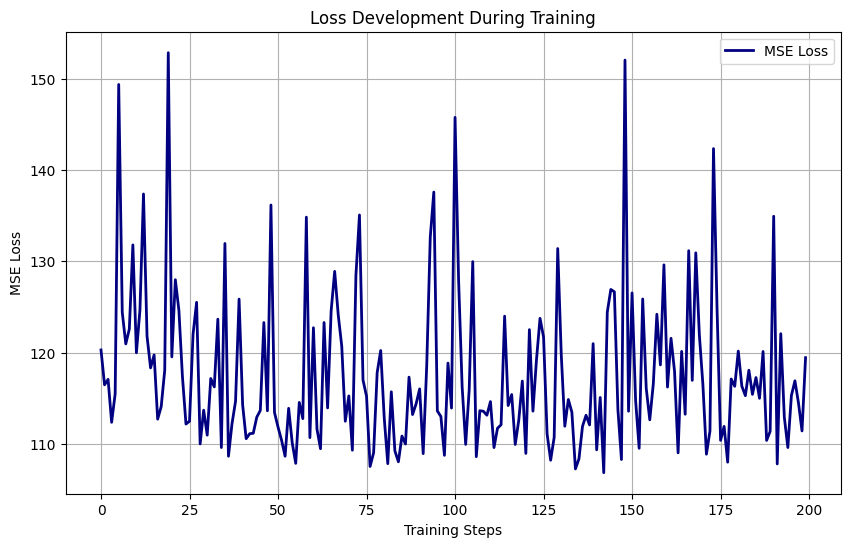

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(custom_mse_list, label='MSE Loss', color='navy', lw=2)
plt.title('Loss Development During Training')
plt.xlabel('Training Steps')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

### Model Evaluation

On the training data

In [9]:
model(x_train)

tensor([[ 3663.2327],
        [ 2537.6421],
        [-1135.6230],
        ...,
        [ 4237.8281],
        [ 1803.4230],
        [ 1949.6493]], grad_fn=<AddmmBackward0>)

In [100]:
# predicting 10 000 times 
models_result = np.array([model(x_train).data.numpy() for k in range(1000)])
models_result

array([[[ 8.172616  ],
        [20.962505  ],
        [50.79776   ],
        ...,
        [ 0.98833126],
        [ 2.0486588 ],
        [44.350273  ]],

       [[ 7.5066895 ],
        [19.751394  ],
        [50.404778  ],
        ...,
        [ 1.209034  ],
        [ 2.3131008 ],
        [45.756554  ]],

       [[ 6.0712    ],
        [19.253529  ],
        [52.230297  ],
        ...,
        [ 0.96882427],
        [ 2.211732  ],
        [46.31571   ]],

       ...,

       [[ 9.817841  ],
        [23.382208  ],
        [52.943436  ],
        ...,
        [ 0.92354375],
        [ 1.9319932 ],
        [47.76066   ]],

       [[ 4.8815413 ],
        [17.590973  ],
        [45.70585   ],
        ...,
        [ 0.7326087 ],
        [ 1.8413343 ],
        [42.950245  ]],

       [[ 5.4265018 ],
        [17.261955  ],
        [46.989655  ],
        ...,
        [ 0.8373813 ],
        [ 2.1909952 ],
        [41.147385  ]]], dtype=float32)

In [101]:
models_result = models_result[:,:,0]    
models_result = models_result.T #transpose--> each row corresponds to the predictions for a single data point across all 10000 iterations
#get mean predictions form each sample
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
#calculate standard derivation of prediction for each sample
std_values = np.array([models_result[i].std() for i in range(len(models_result))])


print('Mean Predictions: ',mean_values)
print('Standard Derivation of Predictions : ',std_values)

Mean Predictions:  [ 7.848511  21.76326   50.472164  ...  0.8750092  2.046199  46.597763 ]
Standard Derivation of Predictions :  [2.0527864  2.5630717  4.083024   ... 0.18887378 0.32913816 3.1397913 ]


In [102]:
#Assuming y_val and y_pred are PyTorch tensors
# Calculate the squared differences
squared_diff = (y_train - mean_values) ** 2

# Calculate the mean of squared differences
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE
rmse = torch.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse.item())

Root Mean Squared Error (RMSE): 36.84879684448242


Text(0, 0.5, 'y')

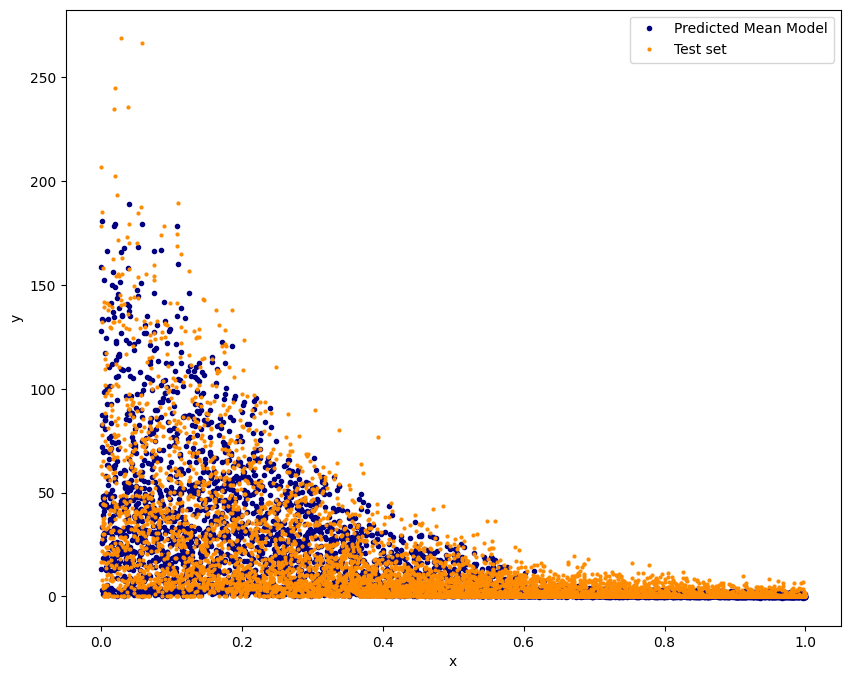

In [103]:
x=torch.unsqueeze(x_train[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_train.data.numpy()

plt.figure(figsize=(10,8))
plt.plot(x,y_pred,'.',color='navy',lw=3,label='Predicted Mean Model')
#plt.fill_between(x_tensor.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
#plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
plt.plot(x,y_true,'.',color='darkorange',markersize=4,label='Test set')
# plt.plot(x_tensor.data.numpy(),clean_target(x_tensor).data.numpy(),color='green',markersize=4,label='Target function')
# plt.ylim((-1,20))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y_true')

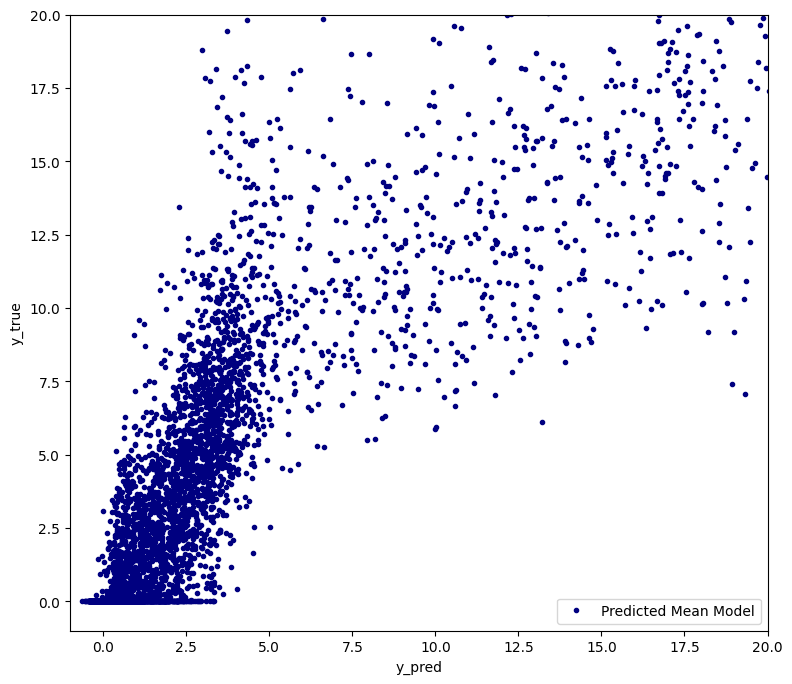

In [106]:
x=torch.unsqueeze(x_train[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_train.data.numpy()

plt.figure(figsize=(9,8))
plt.plot(y_pred,y_true,'.',color='navy',lw=3,label='Predicted Mean Model')
#plt.fill_between(x_tensor.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
#plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
#plt.plot(x,y_true,'.',color='darkorange',markersize=4,label='Test set')
# plt.plot(x_tensor.data.numpy(),clean_target(x_tensor).data.numpy(),color='green',markersize=4,label='Target function')
plt.ylim((-1,20))
plt.xlim((-1,20))
plt.legend()
plt.xlabel('y_pred')
plt.ylabel('y_true')

On the validation data:

In [65]:
# predicting 10 000 times 
models_result = np.array([model(x_val).data.numpy() for k in range(10000)])
models_result

array([[[ 3.16550636e+00],
        [ 3.95702457e+00],
        [-3.49879265e-04],
        ...,
        [ 8.27499390e+00],
        [ 1.46136045e+01],
        [ 3.61785531e-01]],

       [[ 3.32050896e+00],
        [ 4.33542347e+00],
        [ 5.80285072e-01],
        ...,
        [ 1.05728855e+01],
        [ 1.60714111e+01],
        [ 9.32966471e-01]],

       [[ 1.94452822e+00],
        [ 4.29875422e+00],
        [ 4.57409680e-01],
        ...,
        [ 1.01060781e+01],
        [ 1.66375580e+01],
        [ 7.51258314e-01]],

       ...,

       [[ 2.23577213e+00],
        [ 4.26776934e+00],
        [ 2.36670256e-01],
        ...,
        [ 1.12984200e+01],
        [ 1.58641586e+01],
        [ 5.88797033e-01]],

       [[ 1.16166866e+00],
        [ 1.51081967e+00],
        [ 9.95022058e-02],
        ...,
        [ 8.12376785e+00],
        [ 1.36595383e+01],
        [ 4.06558216e-01]],

       [[ 1.43639410e+00],
        [ 1.95977020e+00],
        [ 9.44837213e-01],
        ...,
        

In [66]:
models_result = models_result[:,:,0]    
models_result = models_result.T #transpose--> each row corresponds to the predictions for a single data point across all 10000 iterations
#get mean predictions form each sample
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
#calculate standard derivation of prediction for each sample
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

In [67]:
#Assuming y_val and y_pred are PyTorch tensors
# Calculate the squared differences
squared_diff = (y_val - mean_values) ** 2

# Calculate the mean of squared differences
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE
rmse = torch.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse.item())

Root Mean Squared Error (RMSE): 40.313690185546875


Text(0, 0.5, 'y')

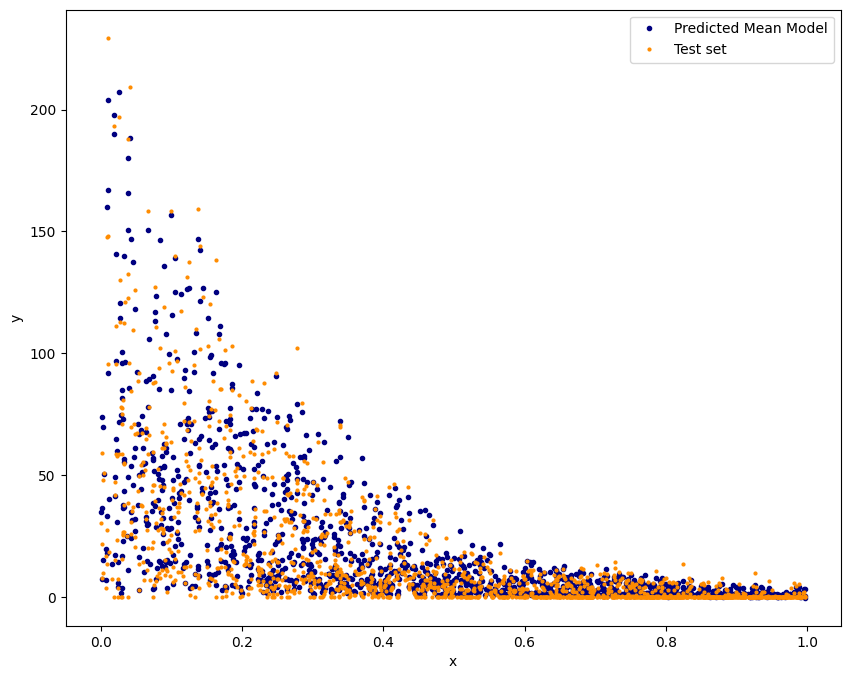

In [69]:
x=torch.unsqueeze(x_val[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_val.data.numpy()

plt.figure(figsize=(10,8))
plt.plot(x,y_pred,'.',color='navy',lw=3,label='Predicted Mean Model')
#plt.fill_between(x_tensor.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
#plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
plt.plot(x,y_true,'.',color='darkorange',markersize=4,label='Test set')
# plt.plot(x_tensor.data.numpy(),clean_target(x_tensor).data.numpy(),color='green',markersize=4,label='Target function')
# plt.ylim((-1,20))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y_true')

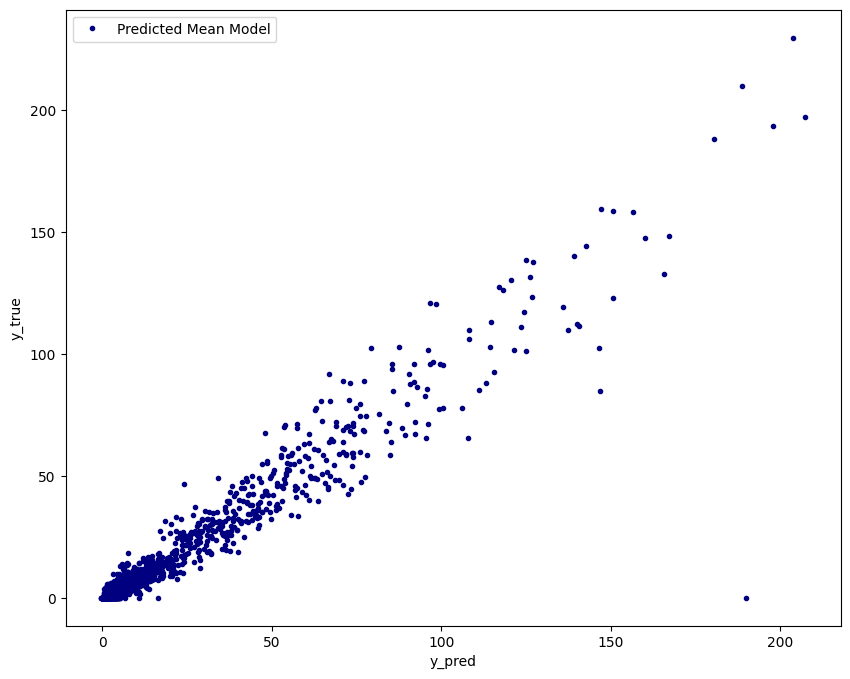

In [71]:
x=torch.unsqueeze(x_val[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_val.data.numpy()

plt.figure(figsize=(10,8))
plt.plot(y_pred,y_true,'.',color='navy',lw=3,label='Predicted Mean Model')
#plt.fill_between(x_tensor.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
#plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
#plt.plot(x,y_true,'.',color='darkorange',markersize=4,label='Test set')
# plt.plot(x_tensor.data.numpy(),clean_target(x_tensor).data.numpy(),color='green',markersize=4,label='Target function')
# plt.ylim((-1,20))
plt.legend()
plt.xlabel('y_pred')
plt.ylabel('y_true')

### Example implementation

In [64]:
x = torch.linspace(-2, 2, 500)
y = x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)


In [65]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=1000),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1),
)


In [66]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)


In [67]:
for step in range(2000):
    pre = model(x)
    mse = mse_loss(pre, y)
    kl = kl_loss(model)
    cost = mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))


- MSE : 1.10, KL : 11.09


In [68]:
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

In [69]:
models_result = np.array([model(x_test).data.numpy() for k in range(10000)])
models_result = models_result[:,:,0]    
models_result = models_result.T
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

Text(0, 0.5, 'y')

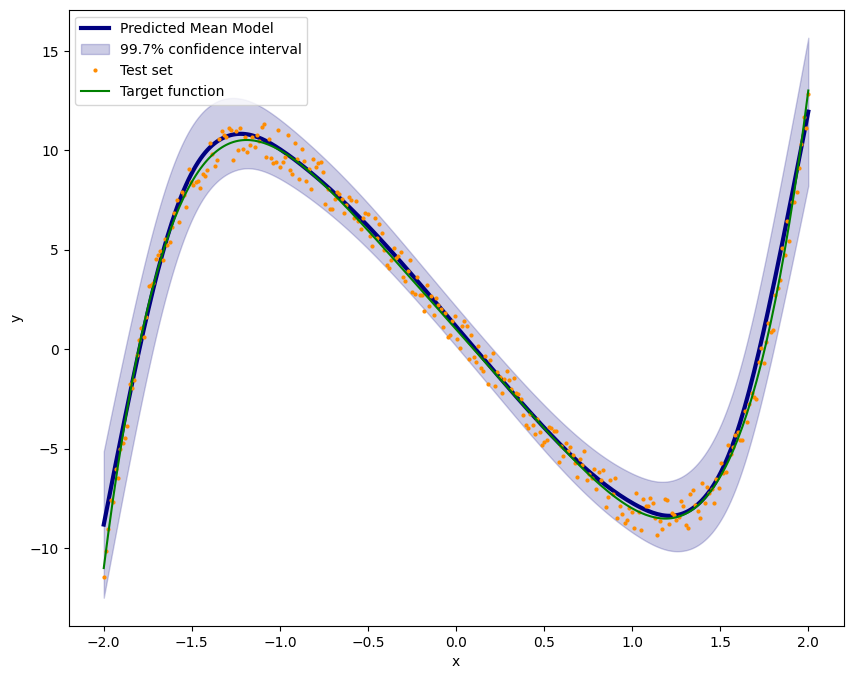

In [70]:
plt.figure(figsize=(10,8))
plt.plot(x_test.data.numpy(),mean_values,color='navy',lw=3,label='Predicted Mean Model')
plt.fill_between(x_test.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
#plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
plt.plot(x_test.data.numpy(),y_test.data.numpy(),'.',color='darkorange',markersize=4,label='Test set')
plt.plot(x_test.data.numpy(),clean_target(x_test).data.numpy(),color='green',markersize=4,label='Target function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

## BNN implementation acc. To source 1
https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/DL2/Bayesian_Neural_Networks/dl2_bnn_tut1_students_with_answers.html

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
import torch.nn as nn

In [ ]:
df=pd.read_csv("TestData\\800_CFB_xy.csv")
df

In [ ]:
x_names = ['L', 'b1',  't_p', 't_w', 'h_w']
y_names=['eta_min_c']

x_data=df[x_names]
x_tensor = torch.tensor(x_data.values).float().squeeze()
y_data=df[y_names]
y_tensor = torch.tensor(y_data.values).float().squeeze()
y_tensor

In [6]:
# #import and clean data
# x_names = ['L', 'b1',  't_p', 't_w', 'h_w',  'fcc', 'fsy', 'fsu', 'esu', 'd1_plate']
# #x_names=['L']
# y_names=['sf3']
# data=pd.concat([pd.read_csv("TestData\\5_CFBSamples.csv")[x_names], pd.read_csv("TestData\\SumRes_5.csv")[y_names]], axis=1)
# data=data[data['sf3']<100]
# #print(data.head())
# data.dropna(axis=0,inplace=True)
# x_data=data[x_names]
# x_tensor = torch.tensor(x_data.values).float().squeeze()
# y_data=data[y_names]
# y_tensor = torch.tensor(y_data.values).float().squeeze()
# # x_tensor[x_tensor.isnan()=='None']
# # x_tensor[0].type()
# print(data.head())

In [7]:
df['eta_min_c'].describe()

count    8001.000000
mean       15.079634
std        27.262112
min         0.000000
25%         0.000000
50%         4.209804
75%        15.477429
max       269.127526
Name: eta_min_c, dtype: float64

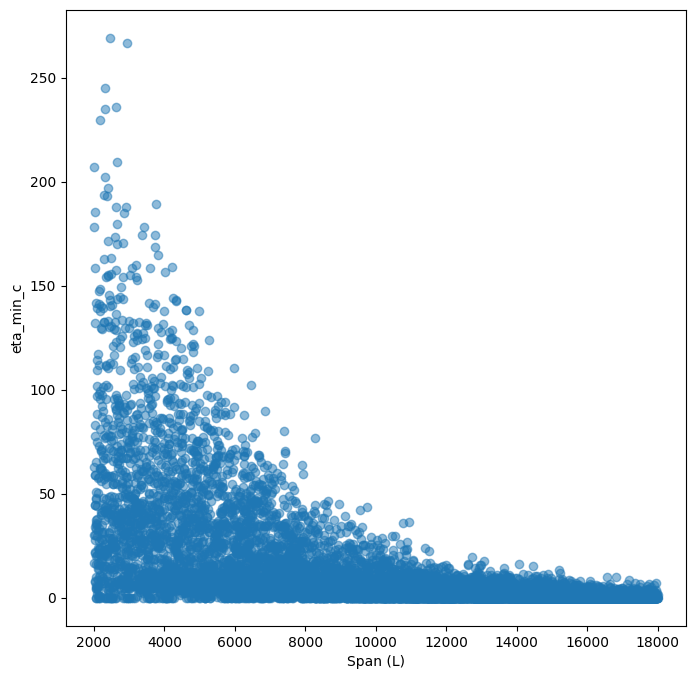

In [9]:
# Plot true vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(x_data['L'], y_data, alpha=0.5)
plt.xlabel('Span (L)')
plt.ylabel('eta_min_c')
# plt.title('True vs Predicted Y Values')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Perfect predictions line
plt.show()

In [10]:
# train, test split

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)
print(x_train.shape)

print(x_train)
print(y_train)

torch.Size([6400, 5])
tensor([[ 4859.7729,  6306.4941,   897.4999,   436.2490,  4011.0386],
        [ 4358.8110,  8561.1074,   974.6630,   571.1037,  4524.8252],
        [ 3687.0498, 15295.9443,   500.5158,  1190.8981,  4822.6636],
        ...,
        [15804.3467, 18942.7617,   702.2180,  1041.2847,  4991.1489],
        [ 8262.1660, 10716.0693,   337.2525,  1119.7019,  2722.0759],
        [ 2575.2234,  6967.8379,   946.5286,   898.9583,  4197.2207]])
tensor([12.0225, 26.3039, 62.0504,  ...,  2.7834,  2.3306, 45.0350])


In [11]:
from sklearn.preprocessing import MinMaxScaler
import torch

# Convert tensors to numpy arrays
x_train_np = x_train.numpy()
x_val_np = x_val.numpy()

# Initialize the MinMaxScaler and fit it on the training data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_np)

# Scale the validation data using the same scaler
x_val_scaled = scaler.transform(x_val_np)

# Convert the scaled arrays back to tensors
x_train = torch.tensor(x_train_scaled, dtype=torch.float32)
x_val = torch.tensor(x_val_scaled, dtype=torch.float32)

In [12]:
mean = x_train.mean(dim=0)
print(mean)
std = x_train.std(dim=0)
print(std)
mean = y_train.mean(dim=0)
print(mean)
std = y_train.std(dim=0)
print(std)

tensor([0.4963, 0.4984, 0.4989, 0.4953, 0.5000])
tensor([0.2890, 0.2865, 0.2890, 0.2885, 0.2881])
tensor(14.9289)
tensor(27.1905)


In [13]:
# # Normalisation

# mean = x_train.mean(dim=0)
# std = x_train.std(dim=0)

# x_train_normalized = (x_train - mean) / std
# x_val_normalized = (x_val - mean) / std

# # Handling potential division by zero if a feature has constant value (std = 0)
# x_train_normalized[torch.isnan(x_train_normalized)] = 0
# x_val_normalized[torch.isnan(x_val_normalized)] = 0

In [14]:
class BNN(PyroModule):
    def __init__(self, in_dim=1, out_dim=1, hid_dim=10, n_hid_layers=5, prior_scale=5.):
        super().__init__()

        self.activation = nn.Tanh()  # could also be ReLU or LeakyReLU
        assert in_dim > 0 and out_dim > 0 and hid_dim > 0 and n_hid_layers > 0  # make sure the dimensions are valid

        # Define the layer sizes and the PyroModule layer list
        self.layer_sizes = [in_dim] + n_hid_layers * [hid_dim] + [out_dim]
        layer_list = [PyroModule[nn.Linear](self.layer_sizes[idx - 1], self.layer_sizes[idx]) for idx in
                      range(1, len(self.layer_sizes))]
        self.layers = PyroModule[torch.nn.ModuleList](layer_list)

        for layer_idx, layer in enumerate(self.layers):
            layer.weight = PyroSample(dist.Normal(0., prior_scale * np.sqrt(2 / self.layer_sizes[layer_idx])).expand(
                [self.layer_sizes[layer_idx + 1], self.layer_sizes[layer_idx]]).to_event(2))
            layer.bias = PyroSample(dist.Normal(0., prior_scale).expand([self.layer_sizes[layer_idx + 1]]).to_event(1))

    def forward(self, x, y=None):
        # x = x.reshape(-1, 1)
        x = self.activation(self.layers[0](x))  # input --> hidden
        for layer in self.layers[1:-1]:
            x = self.activation(layer(x))  # hidden --> hidden
        mu = self.layers[-1](x).squeeze()  # hidden --> output
        sigma = pyro.sample("sigma", dist.Gamma(.5, 1))  # infer the response noise

        # print("mu shape:", mu.shape)
        # print("sigma shape:", sigma.shape)
        # print("y shape:", y.shape)
        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs", dist.Normal(mu, sigma * sigma), obs=y)

        
        return mu

In [15]:
x_train.shape

torch.Size([6400, 5])

In [17]:
from pyro.infer import SVI, Trace_ELBO
from pyro.infer.autoguide import AutoDiagonalNormal
from tqdm.auto import trange
pyro.clear_param_store()

model = BNN(in_dim=5, out_dim=1, hid_dim=20, n_hid_layers=10, prior_scale=5.)
mean_field_guide = AutoDiagonalNormal(model)
optimizer = pyro.optim.Adam({"lr": 0.01})

svi = SVI(model, mean_field_guide, optimizer, loss=Trace_ELBO())
pyro.clear_param_store()

num_epochs = 2500
progress_bar = trange(num_epochs)


losses = []
for epoch in progress_bar:
    loss = svi.step(x_train, y_train)
    avg_loss = loss / x_train.shape[0]
    losses.append(avg_loss)
    progress_bar.set_postfix(loss=f"{loss / x_train.shape[0]:.3f}")

  0%|          | 0/2500 [00:00<?, ?it/s]

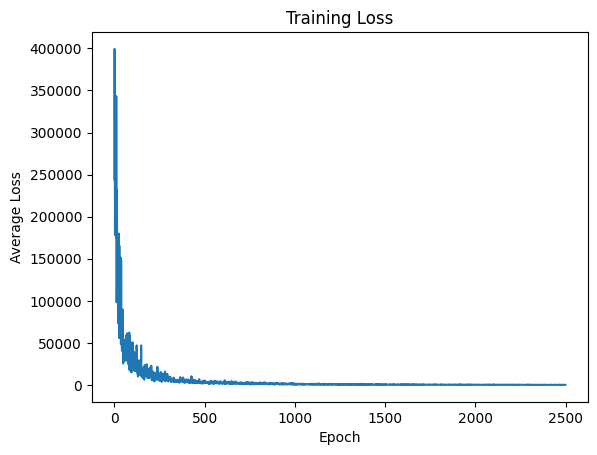

In [18]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.show()

In [19]:
from pyro.infer import Predictive

predictive = Predictive(model, guide=mean_field_guide, num_samples=500)
preds = predictive(x_val)

In [20]:
preds['sigma']

tensor([[1.1387],
        [1.1396],
        [1.0537],
        [1.0545],
        [0.9933],
        [0.9864],
        [1.1812],
        [1.0925],
        [1.0206],
        [1.0973],
        [1.0593],
        [1.0245],
        [1.1559],
        [1.0641],
        [0.9827],
        [1.1196],
        [1.1723],
        [1.1153],
        [1.0074],
        [0.9714],
        [1.1682],
        [1.0342],
        [1.1417],
        [1.1538],
        [1.1378],
        [1.1198],
        [1.1077],
        [1.0728],
        [1.0587],
        [1.1470],
        [1.0126],
        [1.1252],
        [1.0757],
        [1.0677],
        [1.0231],
        [1.0941],
        [1.1728],
        [1.0911],
        [1.1290],
        [1.1591],
        [1.0608],
        [1.0037],
        [1.1054],
        [1.1662],
        [1.1060],
        [0.9675],
        [1.0544],
        [1.1336],
        [1.1854],
        [1.1258],
        [1.1037],
        [1.1795],
        [1.0055],
        [1.0497],
        [1.1803],
        [1

In [21]:
predicted_y_mean = preds['obs'].mean(0)
predicted_y_mean

tensor([ 1.5069,  1.6047,  1.3319,  ...,  4.5621, 11.8945,  1.2790])

In [23]:
# y_pred = preds['obs'].T.detach().numpy().mean(axis=1)
# print(y_pred)
y_pred= preds['obs'][0]
print(y_pred)

tensor([ 3.0927,  3.6550,  4.2311,  ...,  4.8859, 16.8374,  6.1470])


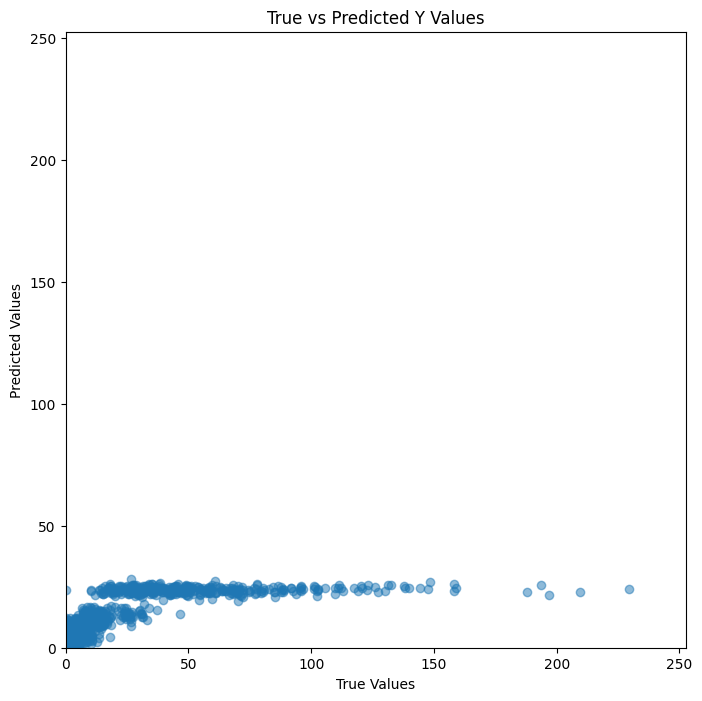

In [24]:
# Plot true vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred, alpha=0.5)
max_value = max(y_val.max(), y_pred.max())
min_value = min(y_val.min(), y_pred.min())
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Y Values')
plt.xlim(-0.1 * min_value, 1.1 * max_value)
plt.ylim(-0.1 * min_value, 1.1 * max_value)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Perfect predictions line
plt.show()

In [28]:
#Assuming y_val and y_pred are PyTorch tensors
# Calculate the squared differences
squared_diff = (y_val - y_pred) ** 2

# Calculate the mean of squared differences
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE
rmse = torch.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse.item())

Root Mean Squared Error (RMSE): 22.71416473388672


In [26]:
def plot_predictions(preds):
    y_pred = preds['obs'].T.detach().numpy().mean(axis=1)
    y_std = preds['obs'].T.detach().numpy().std(axis=1)

    fig, ax = plt.subplots(figsize=(10, 5))
    # xlims = [-0.5, 1.5]
    # ylims = [-1.5, 2.5]
    # plt.xlim(xlims)
    # plt.ylim(ylims)
    plt.xlabel("X", fontsize=30)
    plt.ylabel("Y", fontsize=30)

    #ax.plot(x_true, y_true, 'b-', linewidth=3, label="true function")
    ax.plot(x_train[:, 0] , y_train, 'ko', markersize=4, label="observations")
    ax.plot(x_train[:, 0], y_train, 'ko', markersize=3)
    ax.plot(x_val[:, 0], y_pred, '-', linewidth=3, color="#408765", label="predictive mean")
    ax.fill_between(x_val[:, 0], y_pred - 2 * y_std, y_pred + 2 * y_std, alpha=0.6, color='#86cfac', zorder=5)

    plt.legend(loc=4, fontsize=15, frameon=False)

In [42]:
x_train[:, 0]

tensor([0.3251, 0.5205, 0.1083,  ..., 0.3775, 0.6774, 0.4823])

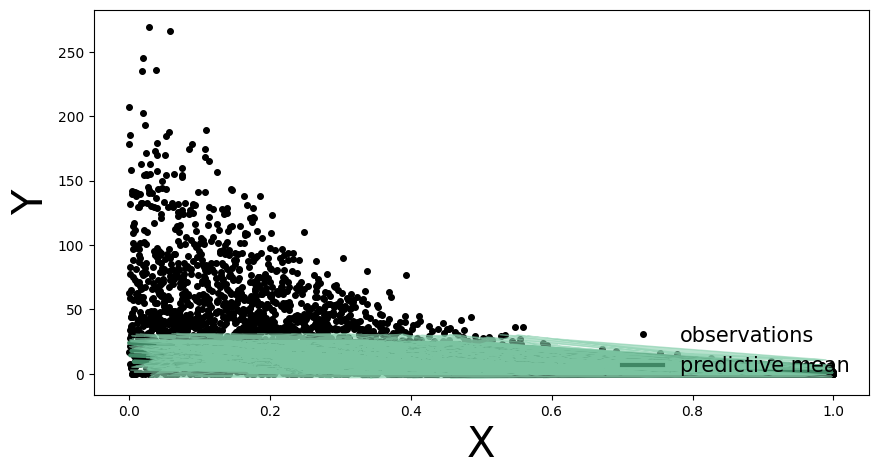

In [27]:
plot_predictions(preds)